In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

a. Faça uma análise inicial sobre esse dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(iris_df.head())

print(iris_df.describe())
print(iris_df.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.


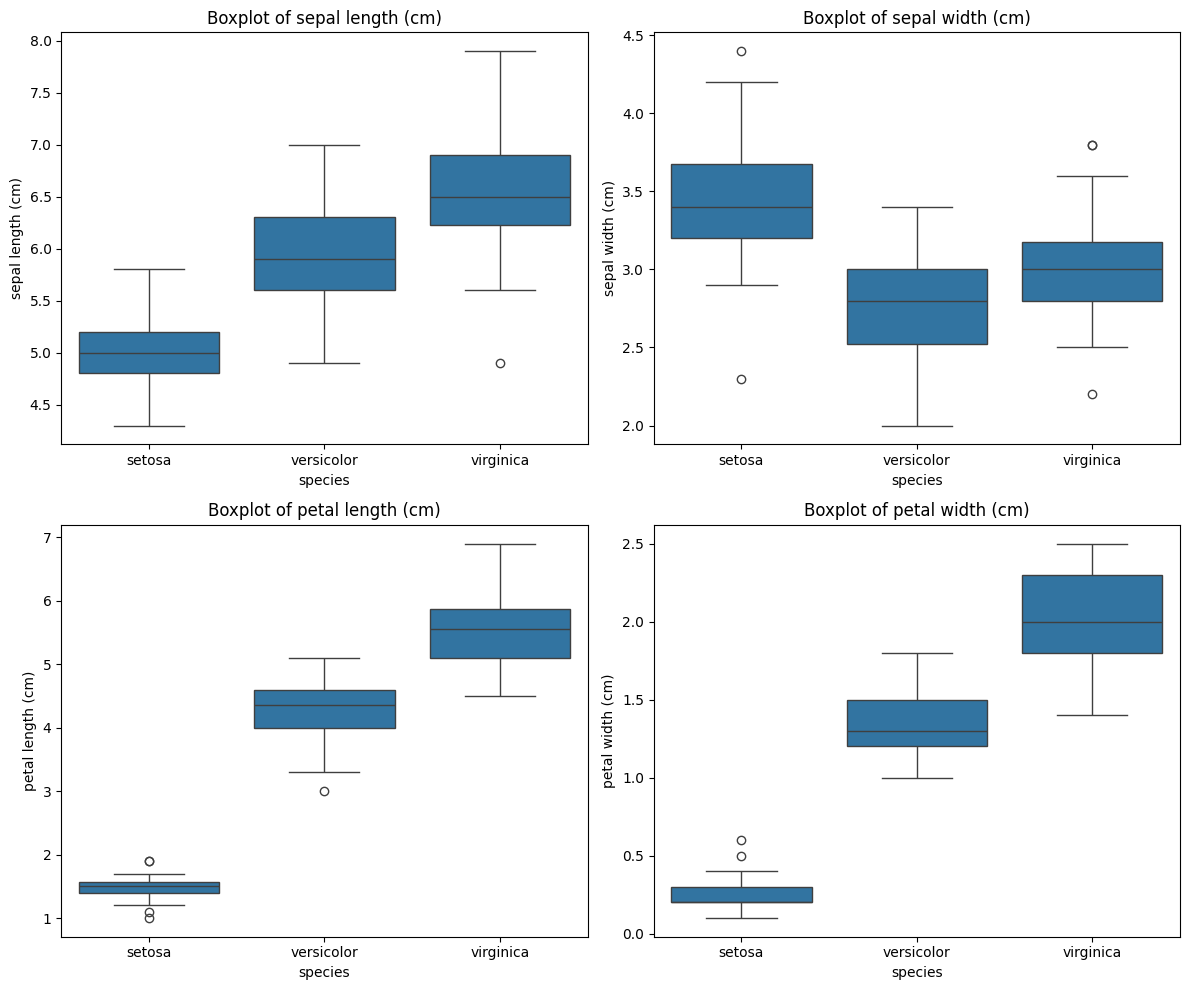

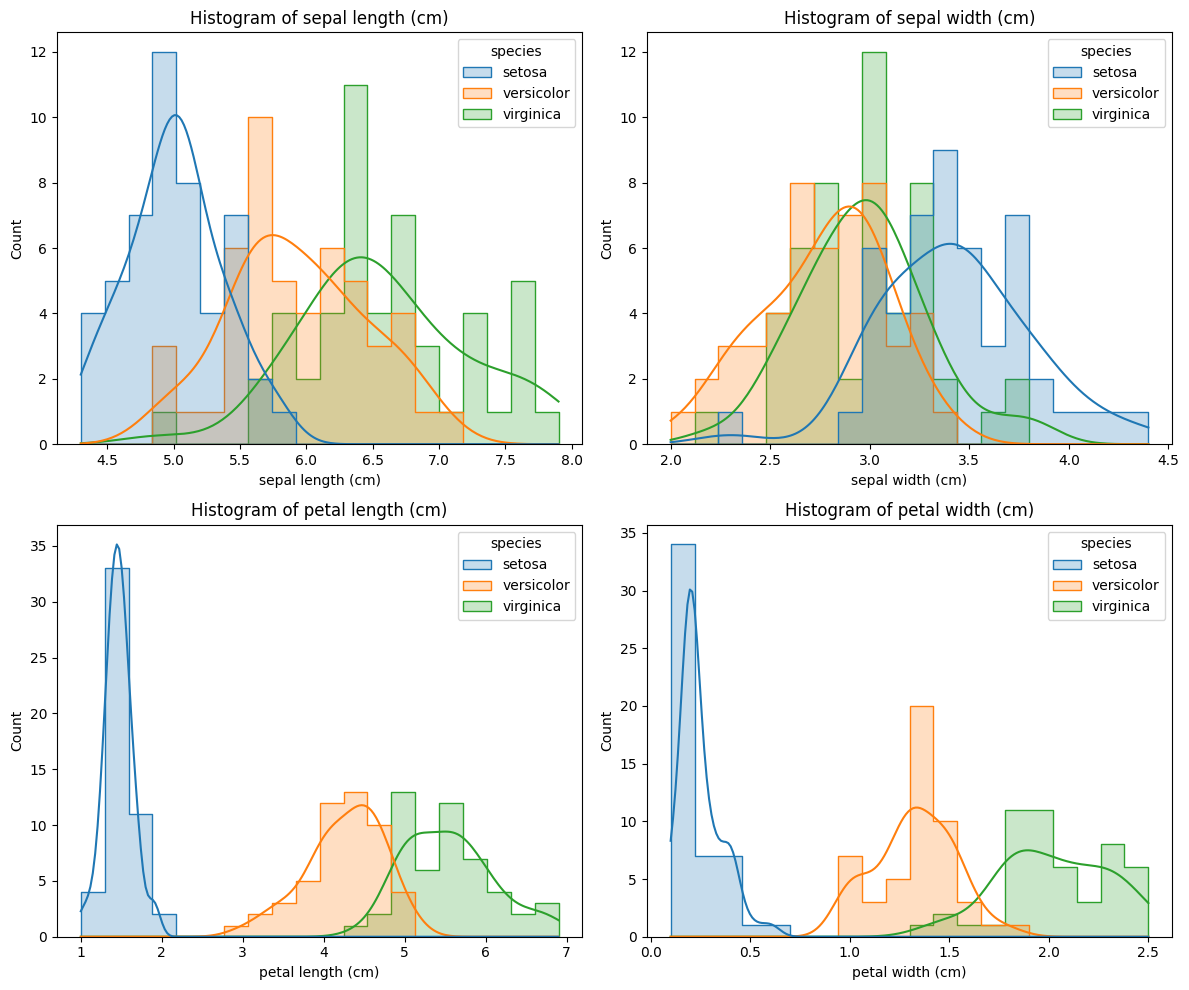

In [ ]:
plt.figure(figsize=(12, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))

for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, bins=20, kde=True, hue='species', element='step')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

c. Somente olhando esses gráficos, é possível utilizando uma ou
mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length,
Petal_Width) que sejam suficientes para diferenciar entre as
diferentes espécies?


Analisando os histogramas das variáveis do dataset Iris, podemos observar algumas diferenças entre as espécies que permitem sua distinção com base nas características das pétalas e sépalas. Primeiramente, em relação ao comprimento da sépala (Sepal Length), notamos que setosa possui valores menores e bem distintos das outras espécies, enquanto versicolor e virginica apresentam uma sobreposição maior, tornando essa variável menos eficiente para distinguir completamente essas duas últimas espécies.

Na largura da sépala (Sepal Width), há ainda mais sobreposição entre as três espécies, o que sugere que essa variável, isoladamente, não é suficiente para separá-las. Por outro lado, as variáveis relacionadas às pétalas — comprimento (Petal Length) e largura (Petal Width) — mostram-se mais informativas. Setosa possui valores visivelmente menores nessas duas variáveis, facilitando sua separação de versicolor e virginica.

Além disso, enquanto versicolor e virginica compartilham intervalos em algumas das variáveis de sépala, o comprimento e a largura da pétala permitem uma distinção razoável, com virginica geralmente apresentando valores mais elevados. Portanto, é possível concluir que as variáveis Petal Length e Petal Width são suficientes para diferenciar as espécies de forma eficaz. Setosa se destaca com valores baixos nessas duas características, enquanto versicolor e virginica ocupam intervalos distintos, o que permite a separação entre as três espécies usando apenas essas variáveis de pétalas.

d. Aplique a regressão logística para avaliar o modelo de
classificação.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Womakers/iris.csv')

X = data[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Acurácia: 1.00
Precisão: 1.00
Recall: 1.00


e. Calcule a acurácia, precisão e recall.


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 1.00


f. Plote a matriz de confusao com matplotlib ou seaborn

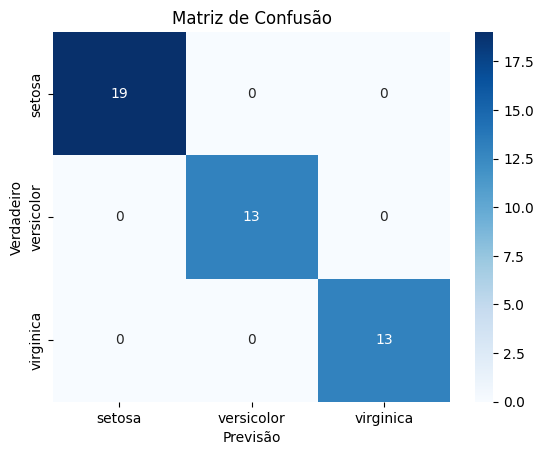

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Previsão")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

2. Utilizando o dataset load_digits. Exemplo de como fazer a
importação do dataset usando o sklearn:

a. Faça uma análise inicial sobre esse
dataset

i. Quantos dados possui?

ii. Existem dados nulos? Se sim quantos?

iii. Todos são dados numéricos ou existem colunas com dados categóricos?


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [ ]:
num_samples, num_features = X.shape
print(f"O dataset possui {num_samples} amostras e {num_features} características.")

O dataset possui 1797 amostras e 64 características.


In [ ]:
df = pd.DataFrame(X)
nulos = df.isnull().sum().sum()
print(f"Existem {nulos} valores nulos no dataset.")

Existem 0 valores nulos no dataset.


In [ ]:
print(f"Tipos de dados: {df.dtypes.unique()}")

Tipos de dados: [dtype('float64')]



b. Aplique a regressão logística para construir e avaliar o modelo de
classificação.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

c. Calcule a acurácia, precisão e recall com base no desempenho do modelo.


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Acurácia: 0.97
Precisão: 0.98
Recall: 0.98


d. Plote a matriz de confusão dos resultados do modelo utilizando matplotlib
ou seaborn.

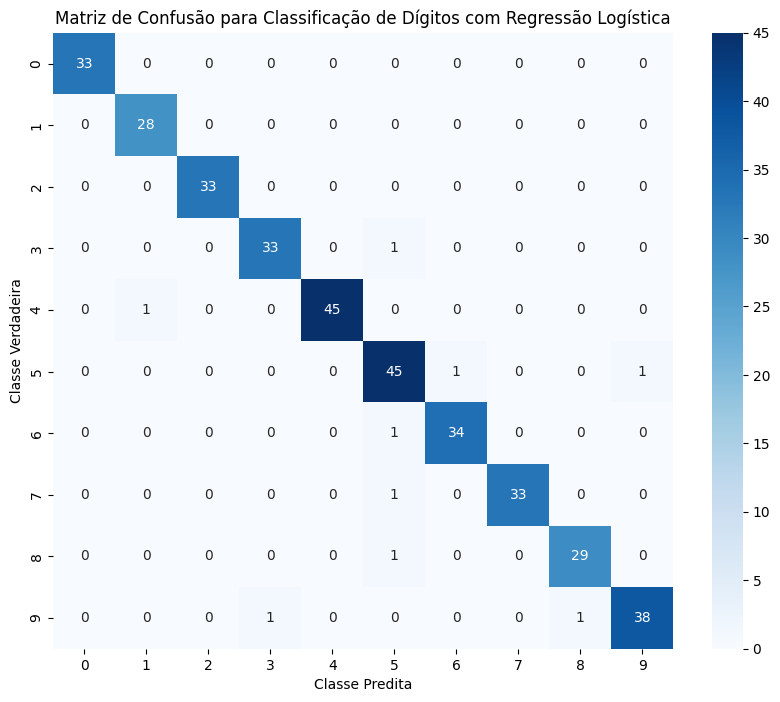

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão para Classificação de Dígitos com Regressão Logística")
plt.show()

e. Aplique a regressão logística para avaliar o modelo de classificação dos
dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema
(por exemplo, MNIST).


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

X_sample, y_sample = X[:10000], y[:10000]

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

model = SGDClassifier(max_iter=1000, tol=1e-3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f. Calcule a acurácia, precisão e recall com base no desempenho do modelo
para a classificação dos dígitos de 0 a 9.


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Acurácia: 0.88
Precisão: 0.89
Recall: 0.88


g. Plote a matriz de confusão dos resultados da classificação dos dígitos de 0
a 9 utilizando matplotlib ou seaborn.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Matriz de Confusão MNIST')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()